# BFS
## INTEGRANTES:
- CORONADO LUIS 
- MEDINA ALVARO 
- QUIZHPE EDISON  
- ZUÑIGA LIAM 

Iniciando la búsqueda en amplitud (BFS) desde el nodo 'ENTRADA' hacia el nodo 'VENADO'...
Nodo final 'VENADO' encontrado.
¡Camino encontrado de ENTRADA a VENADO!
Ruta: ENTRADA -> MONO -> TORTUGA -> GUACAMAYO -> AGUILA -> SAINOS -> CUCHUNCHOS -> OSO DE ANTEOJOS -> RANA -> VENADO


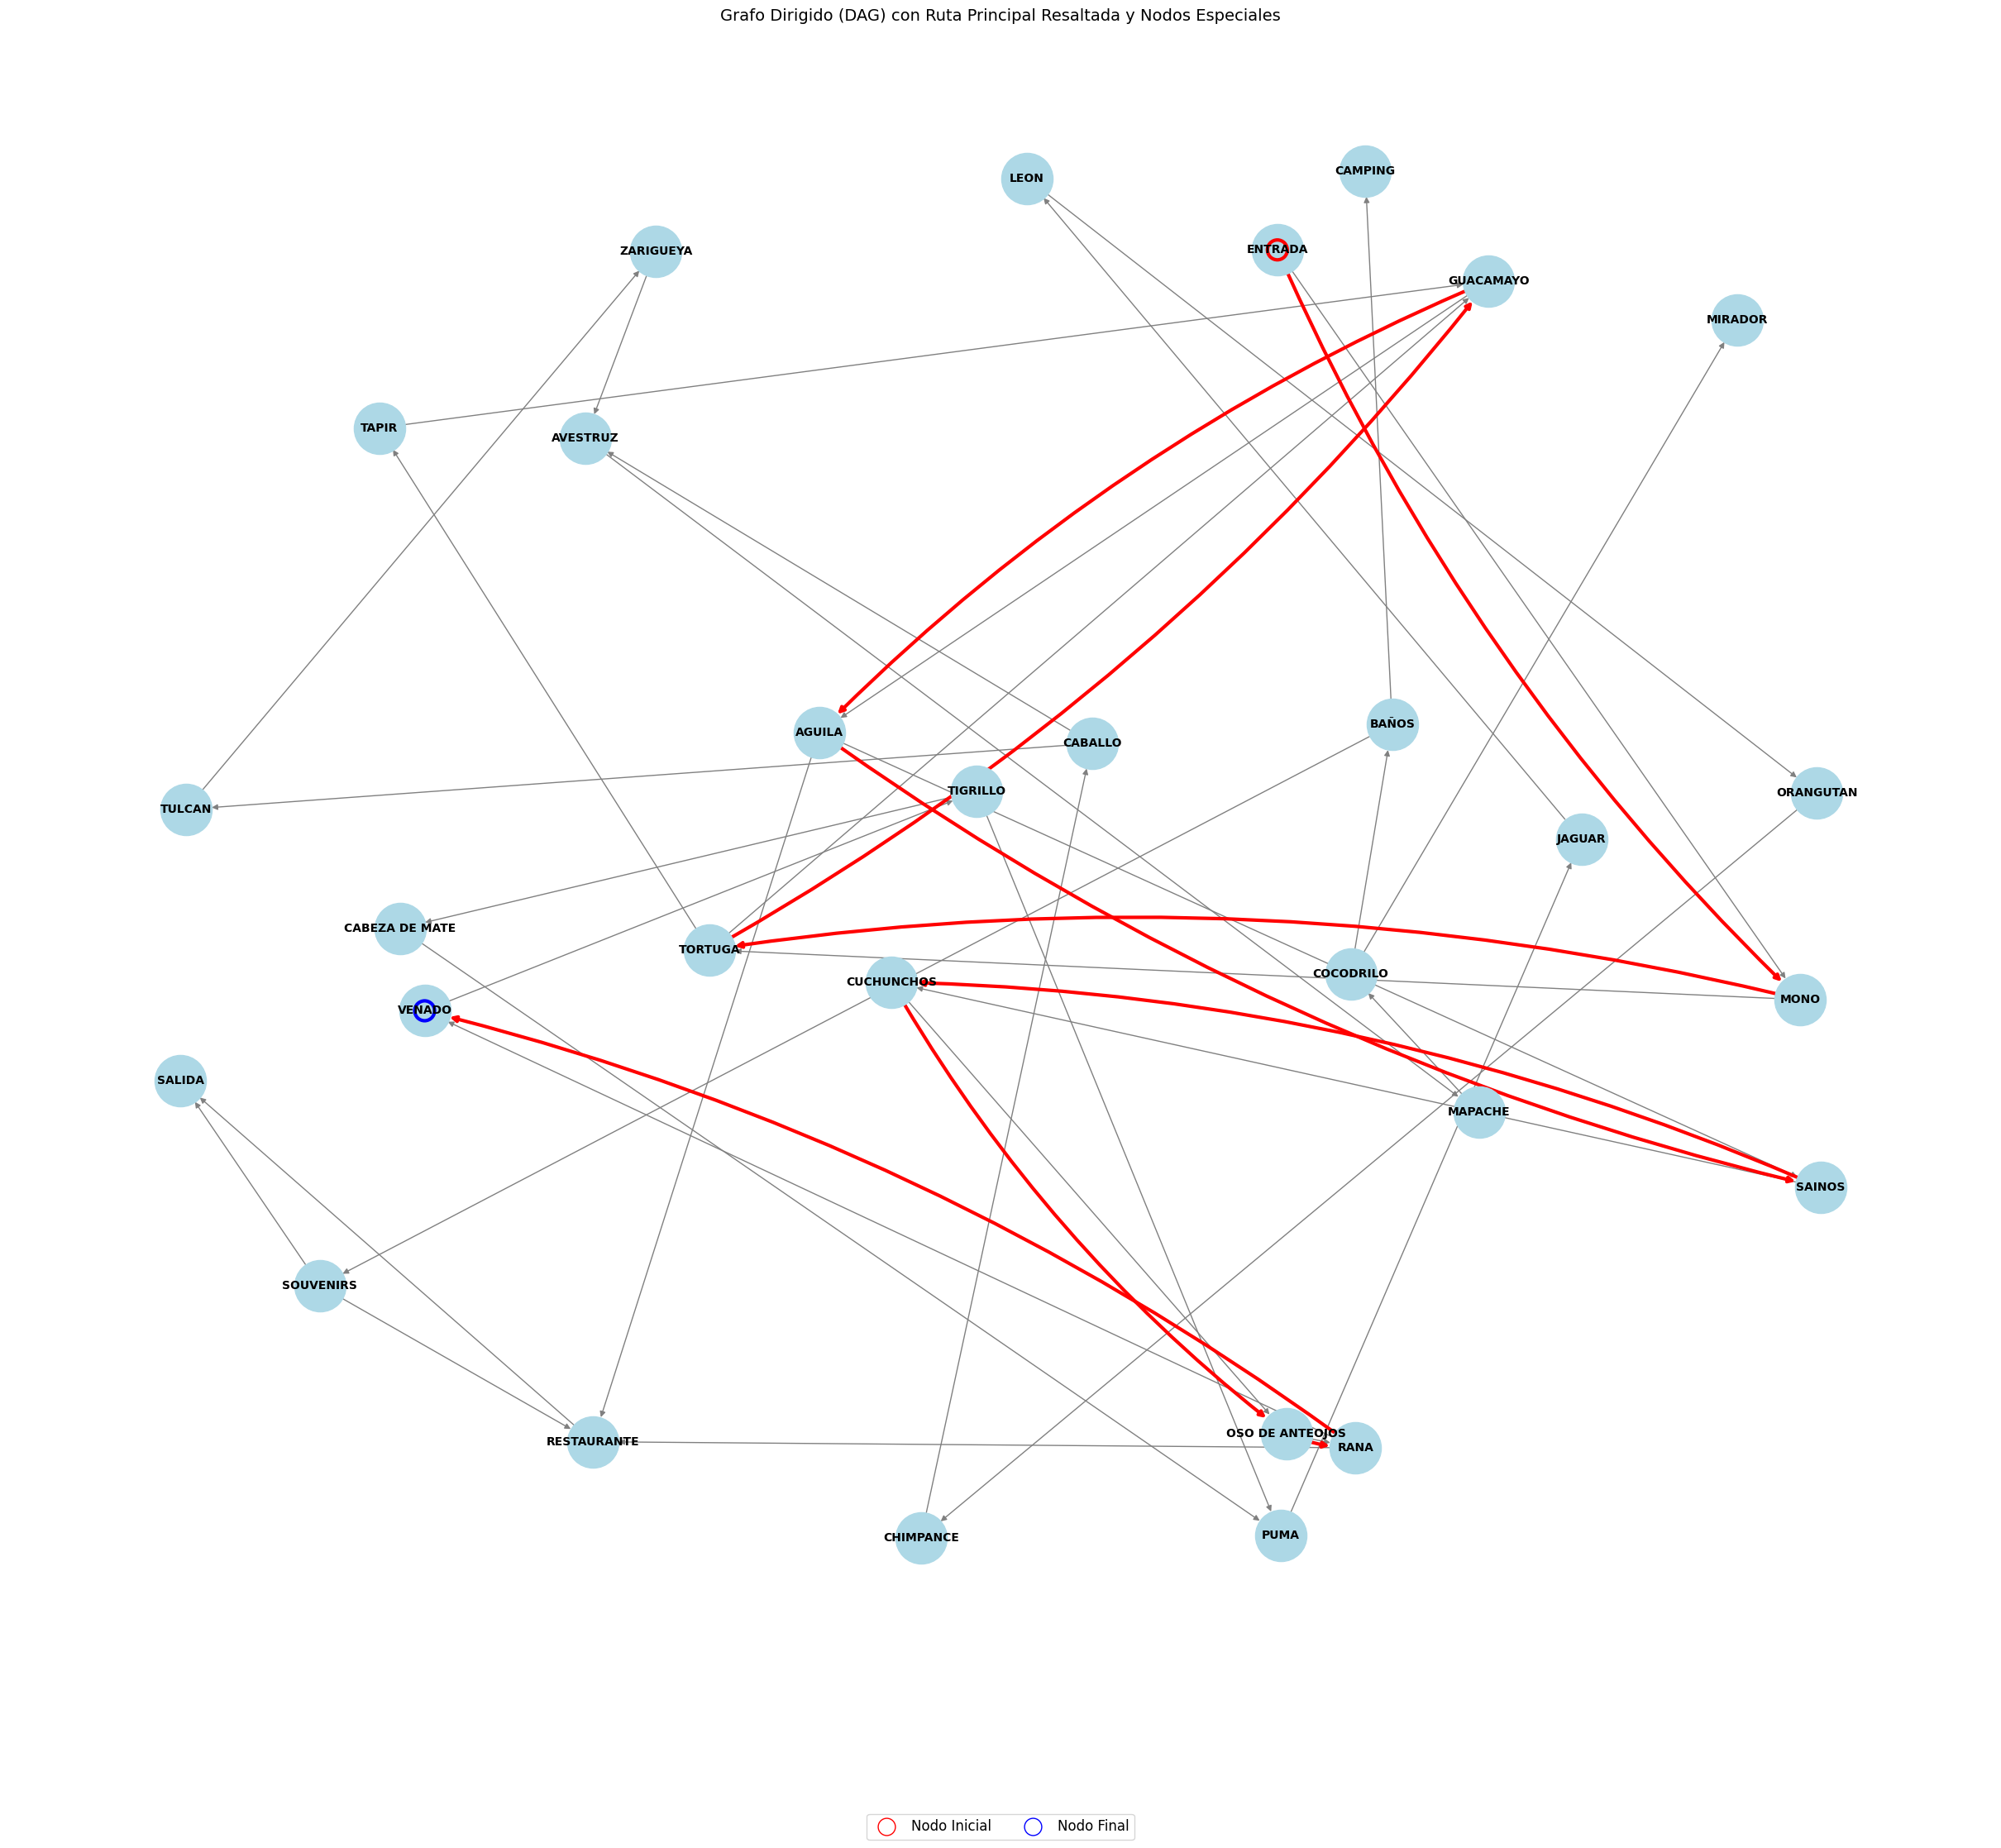

In [1]:
from collections import deque
import networkx as nx
import matplotlib.pyplot as plt

class Nodo:
    def __init__(self, valor):
        self.valor = valor
        self.vecinos = []

    def agregar_vecino(self, vecino):
        self.vecinos.append(vecino)

class Grafo:
    def __init__(self):
        self.nodos = {}
        self.graph = nx.DiGraph()

    def agregar_nodo(self, valor):
        if valor not in self.nodos:
            self.nodos[valor] = Nodo(valor)
            self.graph.add_node(valor)

    def agregar_arista(self, origen, destino):
        if origen not in self.nodos:
            self.agregar_nodo(origen)
        if destino not in self.nodos:
            self.agregar_nodo(destino)

        self.nodos[origen].agregar_vecino(self.nodos[destino])
        self.graph.add_edge(origen, destino)

    def buscar(self, inicio, final):
        if inicio not in self.nodos or final not in self.nodos:
            print(f"Error: Uno o ambos nodos no existen en el grafo.")
            return False, []

        print(f"Iniciando la búsqueda en amplitud (BFS) desde el nodo '{inicio}' hacia el nodo '{final}'...")

        search_queue = deque([inicio])
        predecesores = {inicio: None}

        while search_queue:
            nodo_actual = search_queue.popleft()

            if nodo_actual == final:
                print(f"Nodo final '{final}' encontrado.")
                return True, self._reconstruir_ruta(predecesores, inicio, final)

            for vecino in self.nodos[nodo_actual].vecinos:
                if vecino.valor not in predecesores:
                    search_queue.append(vecino.valor)
                    predecesores[vecino.valor] = nodo_actual

        print(f"No se encontró un camino hacia el nodo '{final}'.")
        return False, []

    def _reconstruir_ruta(self, predecesores, inicio, final):
        ruta = []
        nodo_actual = final
        while nodo_actual is not None:
            ruta.append(nodo_actual)
            nodo_actual = predecesores[nodo_actual]
        ruta.reverse()
        return ruta

    def dibujar_grafo(self, ruta_destacada, inicio, final):
        plt.figure(figsize=(24, 20))
        pos = nx.spring_layout(self.graph, k=1.2, seed=42)  # Mayor separación de nodos

        # Dibujar nodos y aristas generales
        nx.draw(
            self.graph,
            pos,
            with_labels=True,
            node_color="lightblue",
            font_weight="bold",
            font_size=10,
            node_size=2000,
            arrows=True,
            edge_color="gray",
        )

        # Resaltar la ruta principal
        if ruta_destacada:
            ruta_aristas = [(ruta_destacada[i], ruta_destacada[i + 1]) for i in range(len(ruta_destacada) - 1)]
            nx.draw_networkx_edges(
                self.graph,
                pos,
                edgelist=ruta_aristas,
                edge_color="red",
                width=3,
                connectionstyle="arc3,rad=0.1",  # Curvatura para mejor visualización
                arrows=True,
                arrowstyle="-|>",
                min_target_margin=10,
                node_size=2000,
            )

        # Dibujar contorno especial para nodos de inicio y final
        nx.draw_networkx_nodes(self.graph, pos, nodelist=[inicio], node_color="none", edgecolors="red", linewidths=3)
        nx.draw_networkx_nodes(self.graph, pos, nodelist=[final], node_color="none", edgecolors="blue", linewidths=3)

        # Agregar leyendas para los nodos inicial y final
        plt.legend(
            handles=[
                plt.Line2D([0], [0], marker="o", color="w", markerfacecolor="none", markeredgecolor="red", markersize=15, label="Nodo Inicial"),
                plt.Line2D([0], [0], marker="o", color="w", markerfacecolor="none", markeredgecolor="blue", markersize=15, label="Nodo Final"),
            ],
            loc="lower center",
            fontsize=12,
            frameon=True,
            ncol=2,
            bbox_to_anchor=(0.5, -0.1),
        )

        plt.title("Grafo Dirigido (DAG) con Ruta Principal Resaltada y Nodos Especiales", fontsize=14)
        plt.show()

# Crear el grafo
grafo = Grafo()

# Nodos y aristas del grafo
nodos_adyacentes = {
    'ENTRADA': ['MONO'],
    'MONO': ['TORTUGA'],
    'TORTUGA': ['TAPIR', 'GUACAMAYO'],
    'TAPIR': ['GUACAMAYO'],
    'GUACAMAYO': ['AGUILA'],
    'AGUILA': ['SAINOS', 'RESTAURANTE'],
    'SAINOS': ['CUCHUNCHOS'],
    'CUCHUNCHOS': ['OSO DE ANTEOJOS'],
    'OSO DE ANTEOJOS': ['RANA'],
    'RANA': ['RESTAURANTE', 'VENADO'],
    'TIGRILLO': ['CABEZA DE MATE', 'PUMA'],
    'CABEZA DE MATE': ['PUMA'],
    'PUMA': ['JAGUAR'],
    'JAGUAR': ['LEON'],
    'LEON': ['ORANGUTAN'],
    'ORANGUTAN': ['CHIMPANCE'],
    'CHIMPANCE': ['CABALLO'],
    'CABALLO': ['TULCAN', 'AVESTRUZ'],
    'TULCAN': ['ZARIGUEYA'],
    'ZARIGUEYA': ['AVESTRUZ'],
    'AVESTRUZ': ['MAPACHE'],
    'MAPACHE': ['COCODRILO'],
    'COCODRILO': ['BAÑOS', 'MIRADOR'],
    'BAÑOS': ['CAMPING', 'SOUVENIRS'],
    'SOUVENIRS': ['RESTAURANTE', 'SALIDA'],
    'VENADO': ['TIGRILLO'],
    'RESTAURANTE': ['SALIDA'],
    'SALIDA': [],
}

# Agregar nodos y aristas al grafo
for origen, destinos in nodos_adyacentes.items():
    for destino in destinos:
        grafo.agregar_arista(origen, destino)

# Solicitar al usuario los nodos de inicio y final
inicio_usuario = input("Ingresa el nodo de inicio: ").strip().upper()
final_usuario = input("Ingresa el nodo final al que deseas llegar: ").strip().upper()

# Realizar la búsqueda
encontrado, ruta = grafo.buscar(inicio_usuario, final_usuario)
if encontrado:
    print(f"¡Camino encontrado de {inicio_usuario} a {final_usuario}!")
    print(f"Ruta: {' -> '.join(ruta)}")
    grafo.dibujar_grafo(ruta, inicio_usuario, final_usuario)
else:
    print(f"No se pudo encontrar un camino de {inicio_usuario} a {final_usuario}.")
